# Final Project Exploratory Data Analysis

Do your EDA in this notebook!

As usual, first we will import the libraries we need for this project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

When we check the data folder, there's only one CSV file in it

In [2]:
!ls data

understat_per_game.csv


In [3]:
stats_per_game = pd.read_csv('data/understat_per_game.csv')

In [4]:
stats_per_game.head()

,league,year,date,team,h_a,scored,missed,result,pts,xG,xGA,npxG,npxGA,xpts,npxGD,xG_diff,xGA_diff,xpts_diff
0,Bundesliga,2014,22/08/2014 19:30,Bayern Munich,h,2,1,w,3,2.57012,1.198420,2.57012,1.198420,2.3486,1.371700,0.57012,0.198420,-0.6514
1,Bundesliga,2014,30/08/2014 17:30,Bayern Munich,a,1,1,d,1,1.50328,1.307950,1.50328,1.307950,1.5143,0.195330,0.50328,0.307950,0.5143
2,Bundesliga,2014,13/09/2014 14:30,Bayern Munich,h,2,0,w,3,1.22987,0.310166,1.22987,0.310166,2.1588,0.919704,-0.77013,0.310166,-0.8412
3,Bundesliga,2014,20/09/2014 14:30,Bayern Munich,a,0,0,d,1,1.03519,0.203118,1.03519,0.203118,2.1367,0.832072,1.03519,0.203118,1.1367
4,Bundesliga,2014,23/09/2014 19:00,Bayern Munich,h,4,0,w,3,3.48286,0.402844,3.48286,0.402844,2.9287,3.080016,-0.51714,0.402844,-0.0713


In [5]:
stats_per_game.describe()

,year,scored,missed,pts,xG,xGA,npxG,npxGA,xpts,npxGD,xG_diff,xGA_diff,xpts_diff
count,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,2.458000e+04,24580.000000,24580.000000,24580.000000
mean,2016.478438,1.341009,1.341009,1.373841,1.309694,1.309694,1.193872,1.193872,1.378563,7.317174e-19,-0.031315,-0.031315,0.004723
std,1.699285,1.244176,1.244176,1.315111,0.841109,0.841109,0.774719,0.774719,0.823751,1.205702e+00,0.951362,0.951362,1.051608
min,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.007965e+00,-5.943560,-5.943560,-2.965500
25%,2015.000000,0.000000,0.000000,0.000000,0.681165,0.681165,0.621734,0.621734,0.673950,-7.306208e-01,-0.593430,-0.593430,-0.679800
50%,2016.000000,1.000000,1.000000,1.000000,1.150595,1.150595,1.040425,1.040425,1.328900,0.000000e+00,0.092995,0.092995,0.093950
75%,2018.000000,2.000000,2.000000,3.000000,1.769455,1.769455,1.597640,1.597640,2.051025,7.306208e-01,0.588477,0.588477,0.739575
max,2019.000000,10.000000,10.000000,3.000000,6.630490,6.630490,6.610910,6.610910,3.000000,6.007965e+00,5.063130,5.063130,2.940900


In [6]:
stats_per_game.notnull().head(3)

,league,year,date,team,h_a,scored,missed,result,pts,xG,xGA,npxG,npxGA,xpts,npxGD,xG_diff,xGA_diff,xpts_diff
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [7]:
stats_per_game.shape

(24580, 18)

In [8]:
stats_per_game.isnull().sum()

league       0
year         0
date         0
team         0
h_a          0
scored       0
missed       0
result       0
pts          0
xG           0
xGA          0
npxG         0
npxGA        0
xpts         0
npxGD        0
xG_diff      0
xGA_diff     0
xpts_diff    0
dtype: int64

In [9]:
stats_per_game['league'].dropna().value_counts(dropna=False)

La_liga       4560
EPL           4560
Serie_A       4550
Ligue_1       4358
Bundesliga    3672
RFPL          2880
Name: league, dtype: int64

If we look at the frequency of how many times a particular league appears in the database, we notice that EPL, La Liga, and Serie A has similar numbers, while the remaining leagues appear less. But why?

The number of games in any football league depends on **the number of participating clubs**. For example, there are 20 clubs participating in EPL, La Liga, Serie A, and Ligue 1 (18 in Bundesliga and 16 for Russian League) , and that means a total of **380 games** per season. Since we are showing the results for each club individually for each game, we multiply by 2 and get 760 rows of database. Finally, we multiply 760 by 6 (number of years in this data) and get the number above. 

**Note 1**: Since the Ligue 1 2019-20 season was cancelled after playing 28 rounds due to the Covid-19 pandemic, there are only 4358 rows of data for this league, including only partial data for the 2019-20 season

**Note 2**: For Serie A, there were 5 incompleted games that were not included in the database when I download the database. So there are only 4550 rows of data for this league

In [10]:
pd.Series(stats_per_game['team'].unique()).sort_values(ascending=True)

153                   AC Milan
78                      Alaves
73                     Almeria
109                     Amiens
123                      Amkar
                ...           
28        West Bromwich Albion
32                    West Ham
12                   Wolfsburg
52     Wolverhampton Wanderers
119       Zenit St. Petersburg
Length: 168, dtype: object

There are more than 24000 matches in this database. However, the average (mean) goals scored is low at 1.341. This is not surprising considering that football/soccer is a low-scoring sport, and goals are pretty rare event. 

In [11]:
stats_per_game['scored'].describe()

count    24580.000000
mean         1.341009
std          1.244176
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: scored, dtype: float64

In [12]:
expected_goals = stats_per_game[stats_per_game['scored'] == 0]['xG'] 
expected_goals.describe()

count    6979.000000
mean        0.744076
std         0.499044
min         0.000000
25%         0.376219
50%         0.639748
75%         1.001250
max         5.063130
Name: xG, dtype: float64

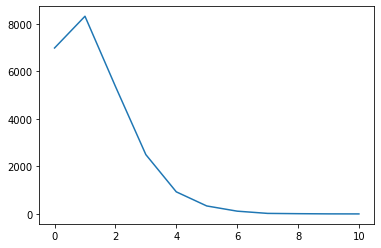

In [13]:
stats_per_game['missed'].value_counts().sort_index().plot();

In [14]:
stats_per_game['result'].value_counts()

l    9189
w    9189
d    6202
Name: result, dtype: int64

Here is a breakdown of the number of goals a club scored per match. As you can see, most games of football will have very few goals (between 0-3 goals). You would barely see a club crushing the opposition by 5 or more goals, because that would mean they scored with almost all the chances they have created.

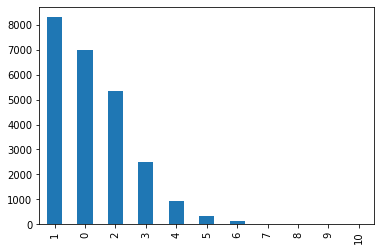

In [15]:
stats_per_game['scored'].value_counts().plot(kind='bar');

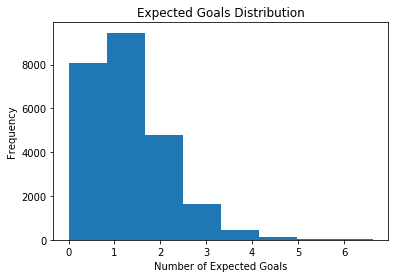

In [16]:
stats_per_game.xG.plot(kind='hist', bins=8)
plt.ylabel('Frequency')
plt.xlabel('Number of Expected Goals')
plt.title('Expected Goals Distribution');

## 1. Expected Goals for Clubs with xG higher than 2 but didn't score any goal

Sometimes, creating many shots and goal-scoring opportunities doesn't mean the team would definitely score goals. Below is a histogram showing the distribution of clubs accumulating more than 2 expected goals but didn't score in the match.

In [17]:
no_goals = stats_per_game[(stats_per_game['xG'] > 2) & (stats_per_game['scored'] == 0)]
no_goals.shape

(167, 18)

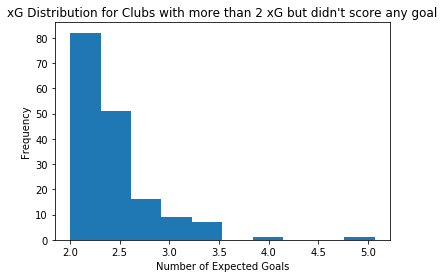

In [18]:
no_goals.xG.plot(kind='hist', bins=10)
plt.ylabel('Frequency')
plt.xlabel('Number of Expected Goals')
plt.title("xG Distribution for Clubs with more than 2 xG but didn't score any goal");

In other cases, a club might create very few chances and shots to threaten the opposition, but they managed to get the win. This histogram shows the distribution of how many times expected goals were less than 1. This statistic shows how important it is to score a goal, and not just creating chances that would be squandered.

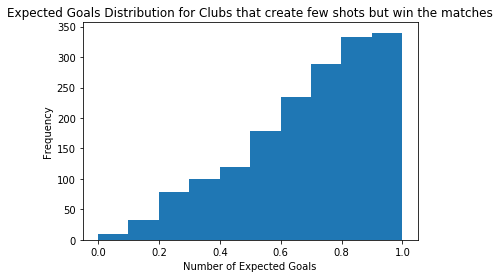

In [19]:
goals_but_low_xG = stats_per_game[(stats_per_game['xG'] < 1) & (stats_per_game['result'] == "w")]
goals_but_low_xG.xG.plot(kind='hist', bins=10)
plt.ylabel('Frequency')
plt.xlabel('Number of Expected Goals')
plt.title("Expected Goals Distribution for Clubs that create few shots but win the matches");

In [20]:
goals_with_penalties = stats_per_game[(stats_per_game['xG'] > stats_per_game['npxG'])]
goals_with_penalties[['xG', 'npxG']]

,xG,npxG
7,2.49826,1.740490
9,2.64367,1.886050
20,4.17851,3.420730
21,3.12815,2.370380
23,1.33559,0.577811
...,...,...
24571,1.75314,0.991880
24572,2.04843,1.287140
24573,3.02321,2.261910
24576,1.69932,0.938022


Now this chart is interesting, but there are some notes to point out. I have created a new column called **npxG**: the expected goals **without penalties and own goals from the opposition**. npxG_diff is the difference between expected goals with and without penalties and own goals.

In [21]:
stats_per_game['npxG_diff'] = stats_per_game['xG'] - stats_per_game['npxG']
goals_with_penalties = stats_per_game[(stats_per_game['xG'] > stats_per_game['npxG'])]
goals_with_penalties[['team', 'scored', 'xG', 'npxG', 'npxG_diff']]

,team,scored,xG,npxG,npxG_diff
7,Bayern Munich,6,2.49826,1.740490,0.757770
9,Bayern Munich,2,2.64367,1.886050,0.757620
20,Bayern Munich,8,4.17851,3.420730,0.757780
21,Bayern Munich,6,3.12815,2.370380,0.757770
23,Bayern Munich,3,1.33559,0.577811,0.757779
...,...,...,...,...,...
24571,Lecce,1,1.75314,0.991880,0.761260
24572,Lecce,2,2.04843,1.287140,0.761290
24573,Lecce,2,3.02321,2.261910,0.761300
24576,Lecce,1,1.69932,0.938022,0.761298


If we notice, the npxG_diff for every club that has a higher xG than npxG is 0.75 or higher. Why is that?

Because all penalties are the same: they are 12 yards from the goal, and every player taking the penalties take it from the same position. 0.75 is the expected goal for a penalty, which means there is a 75% of successfully scoring from the spot.

In the football rulebook, a win is worth 3 points, a draw is 1 point, and a loss is 0 points. However, with the expected points statistics, we have a more realistic look at how many points the club is expected to earn based on the quality of their chances and how those chances would have affected the match in the long run. The chart shows a distribution from 0 expected points to 3 (the most points a club can earn for a win)

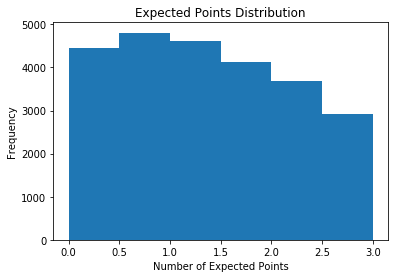

In [22]:
stats_per_game.xpts.plot(kind='hist', bins=6)
plt.ylabel('Frequency')
plt.xlabel('Number of Expected Points')
plt.title('Expected Points Distribution');

This list below shows how some clubs are expected to earn much fewer points despite winning the match. **xpts_diff** is the difference between actual points earned and expected points.

In [23]:
win_but_low_xpts = stats_per_game[(stats_per_game['result'] == 'w' ) & (stats_per_game['xpts'] < 1)]
win_but_low_xpts[['team', 'scored', 'missed', 'xG', 'xGA','xpts', 'xpts_diff']]

,team,scored,missed,xG,xGA,xpts,xpts_diff
53,Hamburger SV,2,1,0.674771,2.24545,0.3214,-2.6786
93,Bayer Leverkusen,1,0,1.317400,1.79663,0.9871,-2.0129
95,Bayer Leverkusen,3,2,0.970257,2.21349,0.4237,-2.5763
152,Augsburg,2,1,1.655610,2.17588,0.9716,-2.0284
164,Augsburg,2,1,1.144010,2.41152,0.4976,-2.5024
...,...,...,...,...,...,...,...
24450,SPAL 2013,2,1,1.210910,2.45221,0.5803,-2.4197
24482,Parma Calcio 1913,1,0,0.602606,1.19231,0.8429,-2.1571
24483,Parma Calcio 1913,2,1,1.292770,1.88263,0.9867,-2.0133
24491,Parma Calcio 1913,1,0,0.819298,1.39228,0.8363,-2.1637


There are several factors that contribute to this unusual outcome. It could be that the winning team is expected to score fewer goals than they actually scored, meaning that they take their chances and score. It could also mean that they are expected to concede more goals (xGA) than they actually missed in the match, which has a negative affect on the expected points earned for that game.